In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_data.csv')

In [3]:
df.shape

(1000, 8)

In [4]:
df.isna().sum()

name                  0
age                   0
gender                0
education             0
income                0
country               0
purchase_frequency    0
spending              0
dtype: int64

In [5]:
df.nunique()

name                   991
age                     48
gender                   2
education                4
income                 997
country                239
purchase_frequency      10
spending              1000
dtype: int64

In [6]:
df.dtypes

name                   object
age                     int64
gender                 object
education              object
income                  int64
country                object
purchase_frequency    float64
spending              float64
dtype: object

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,41.754000,13.778582,18.000,30.000,42.000,54.0000,65.0
income,1000.0,59277.852000,23258.377128,20031.000,38825.500,58972.000,79114.0000,99780.0
purchase_frequency,1000.0,0.554600,0.284675,0.100,0.300,0.600,0.8000,1.0
spending,1000.0,9613.296835,5484.707210,611.985,5020.425,9430.395,13645.5075,25546.5


In [8]:
df.duplicated().sum()

0

# EDA 

In [9]:
df_ori = df.copy()

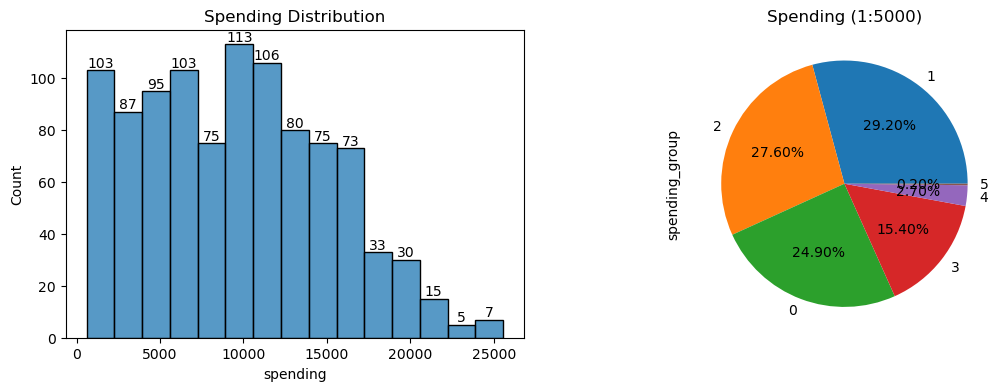

In [10]:
fig = plt.subplots(1,2,figsize=(13,4))

plt.subplot(1,2,1)
ax = sns.histplot(data=df, x=df['spending'])
ax.bar_label(ax.containers[0])
ax.set_title('Spending Distribution')

plt.subplot(1,2,2)
df['spending_group'] = [ int(i/5000) for i in df['spending']]
ax = df['spending_group'].value_counts().plot.pie(autopct='%1.2f%%')
ax.set_title('Spending (1:5000)')

plt.show()

In [11]:
def numplot(df,x,scale):
    
    fig= plt.subplots(2,1,figsize=(15,10))
    
    plt.subplot(2,1,1)
    ax=sns.histplot(data=df, x=x, kde=True, edgecolor='k')
    ax.bar_label(ax.containers[0])
    #title = x + ' Distribution'
    plt.title(x + ' distribution')
    
    plt.subplot(2,1,2)
    #scl = str(scale)
    #scaling = x + '_group'
    df[(x + '_group')] = [ int(i/scale) for i in df[x]]
    ax=sns.lineplot(data=df, x=(x + '_group'), y=df['spending'])
    title2= x + ' (1:' +  str(scale) + ') vs spending' 
    plt.title(title2)

In [12]:
def catplot(df,x):
    
    sns.set(style='whitegrid')
    fig = plt.subplots(2,2,figsize=(15,8))
    
    plt.subplot(2,2,1)
    df[x].value_counts().plot.pie(autopct='%1.2f%%', textprops={'fontsize':12})
    
    plt.subplot(2,2,2)
    ax=sns.histplot(data=df, x=x)
    ax.bar_label(ax.containers[0])
    
    plt.subplot(2,2,3)
    sns.boxplot(data=df, x=x, y=df['spending'])
    
    plt.subplot(2,2,4)
    sns.lineplot(data=df, x=x, y=df['spending'])
    
    plt.suptitle(x + ' distribution')

### Age 

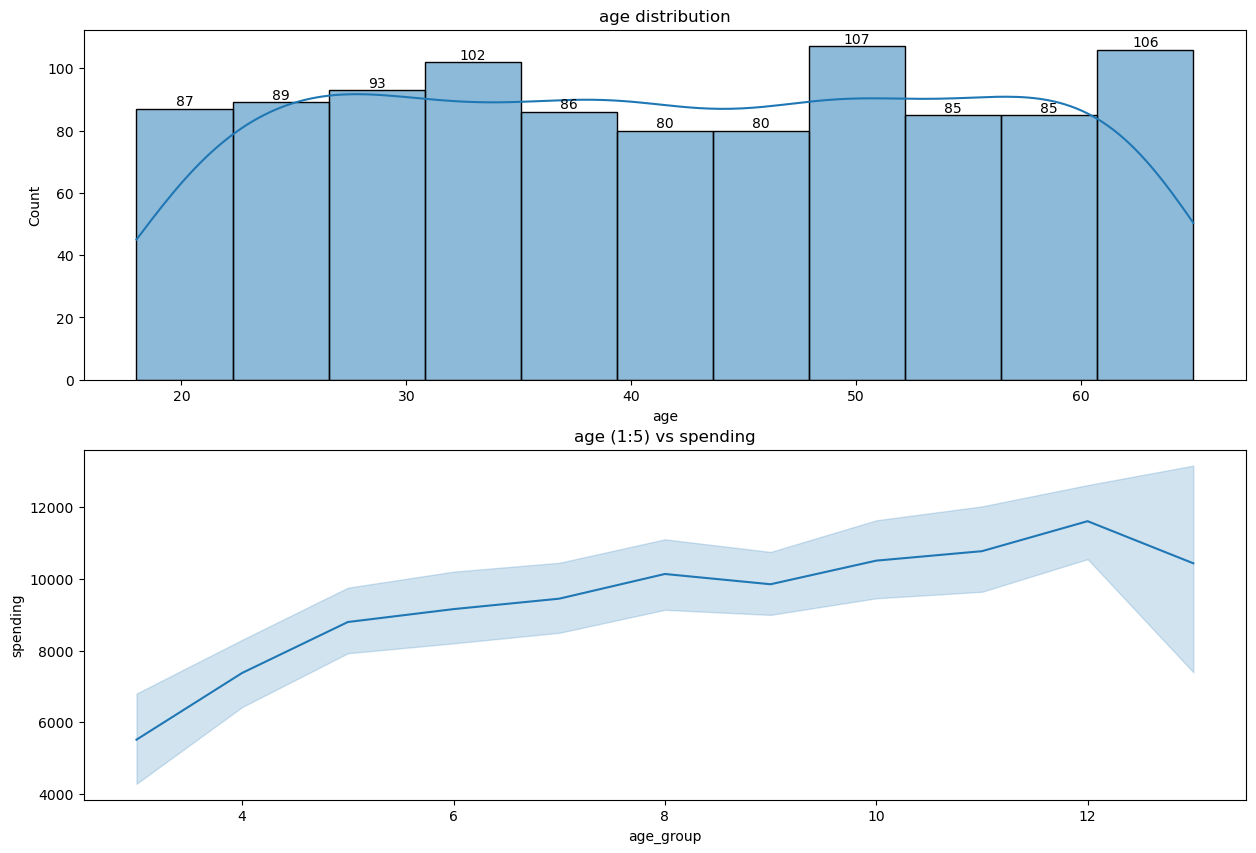

In [13]:
numplot(df,'age',5)

### Gender 

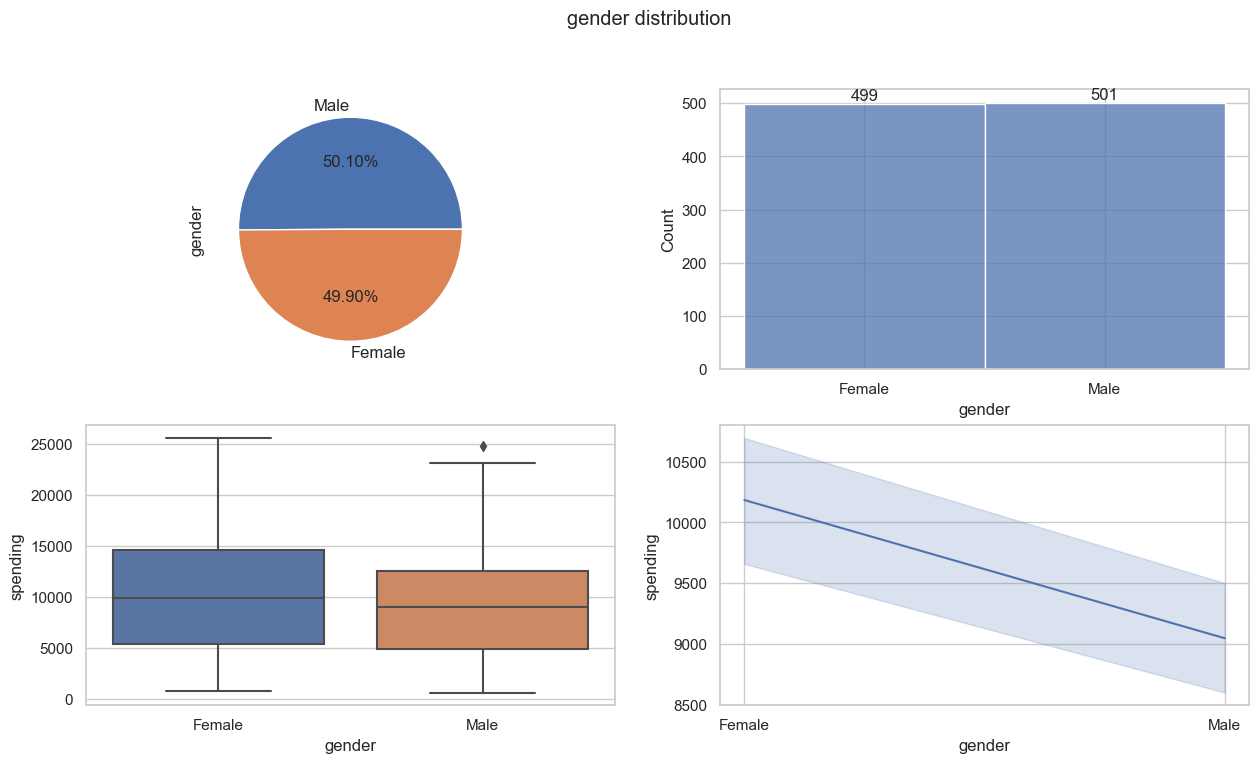

In [14]:
catplot(df,'gender')

### Education 

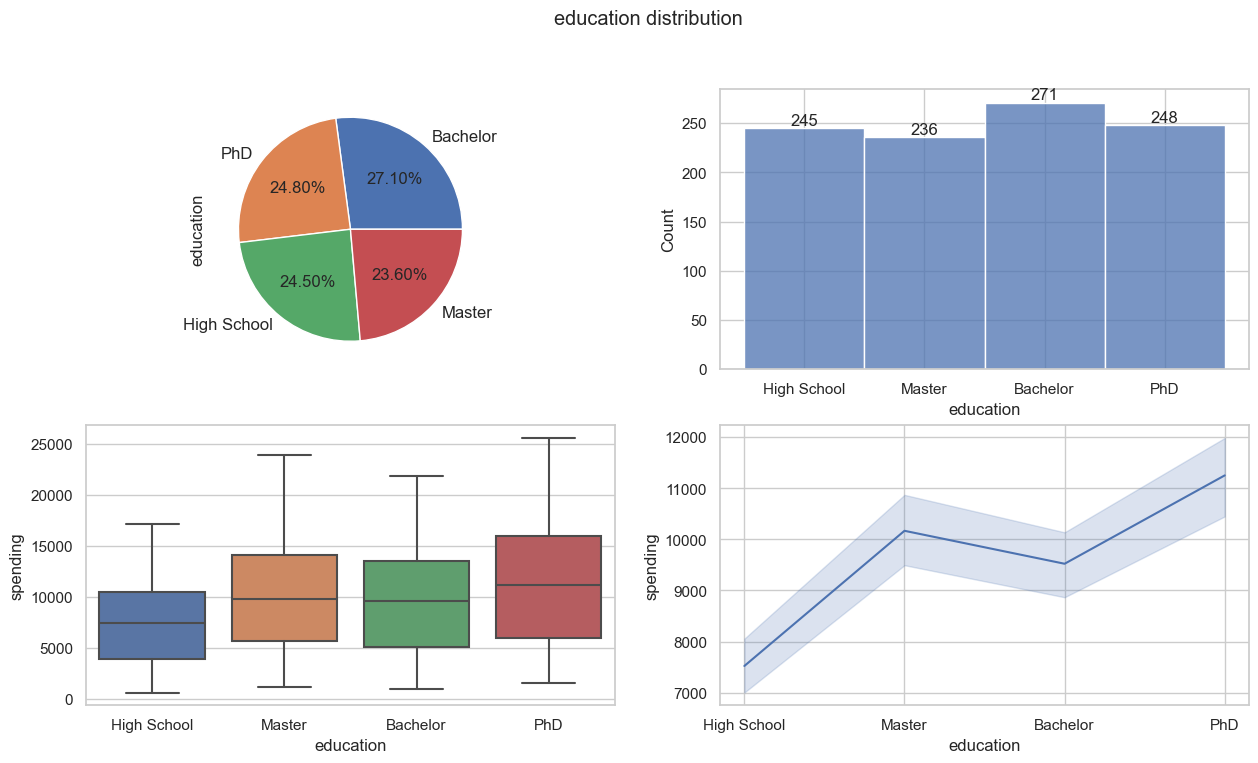

In [15]:
catplot(df,'education')

### Income

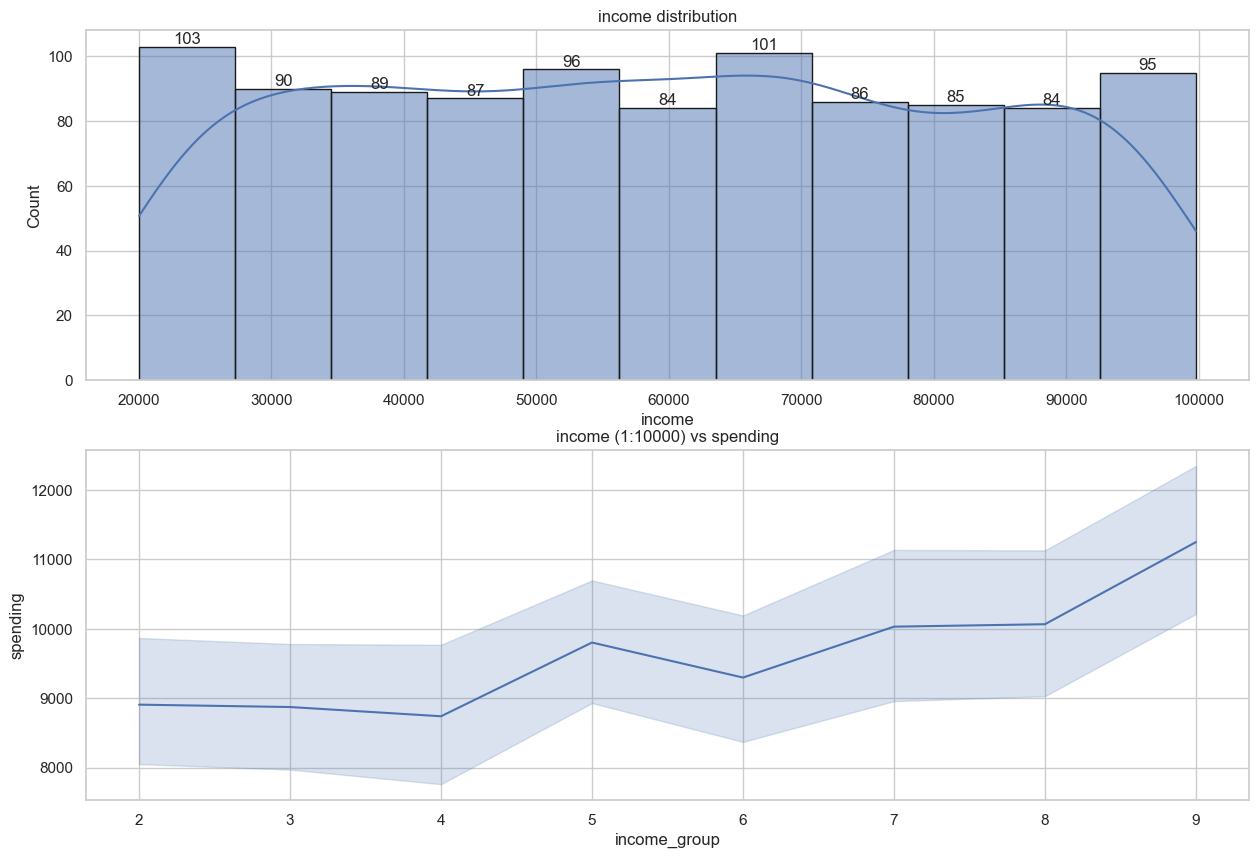

In [16]:
numplot(df,'income',10000)

### Purchase Frequency 

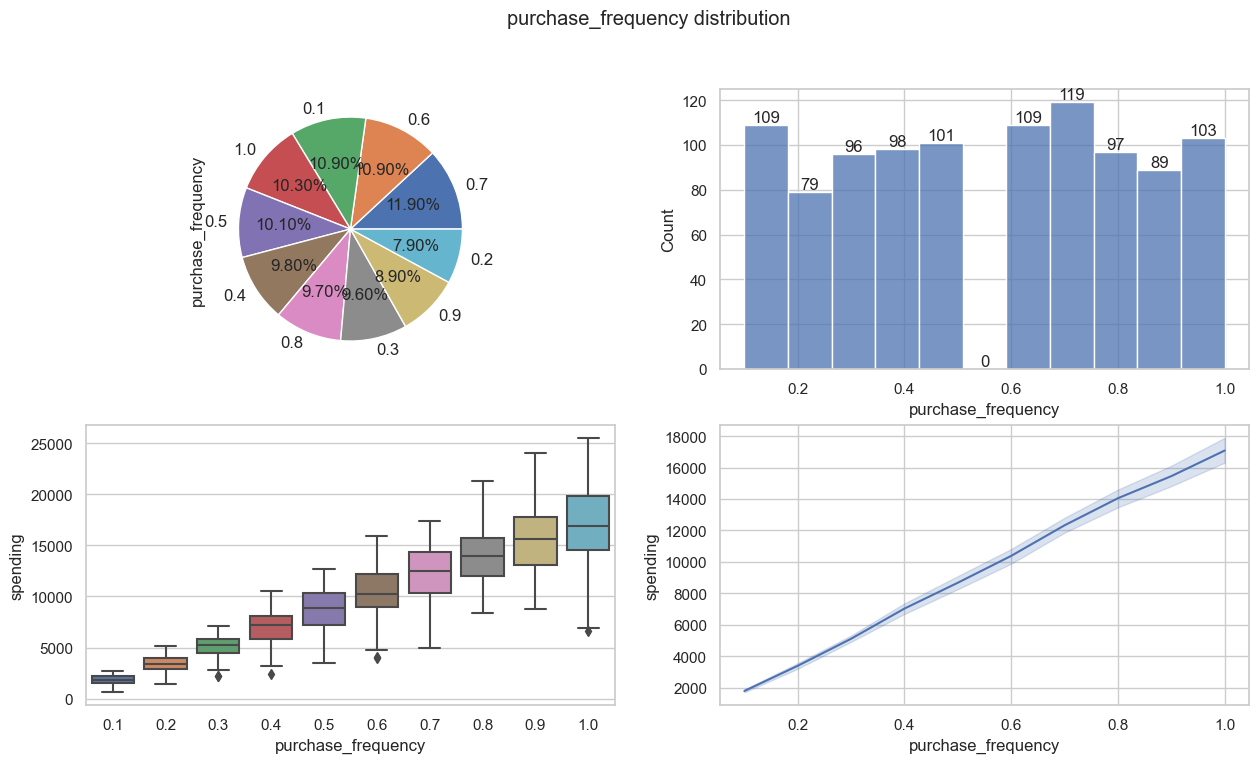

In [17]:
catplot(df,'purchase_frequency')

## Compare Two Features with Target Variable 

In [18]:
columns = ['age_group', 'gender', 'education',  'income_group', 'purchase_frequency']

In [19]:
def comp(x):
    
    fig = plt.subplots(2,2,figsize=(20,11))
    col = columns.copy()
    col.remove(x)
    for i in range(4):
        plt.subplot(2,2,i+1)
        sns.lineplot(data=df, x=col[i], y=x, hue=df['spending_group'], linewidth=4)
        plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
        #title = x + ' x ' + col[i] + ' vs spending'
        plt.title(x + ' x ' + col[i] + ' vs spending')
    #title_2 = x + ' vs other feature'
    plt.suptitle(x + ' vs other feature')

### Age vs Other Features 

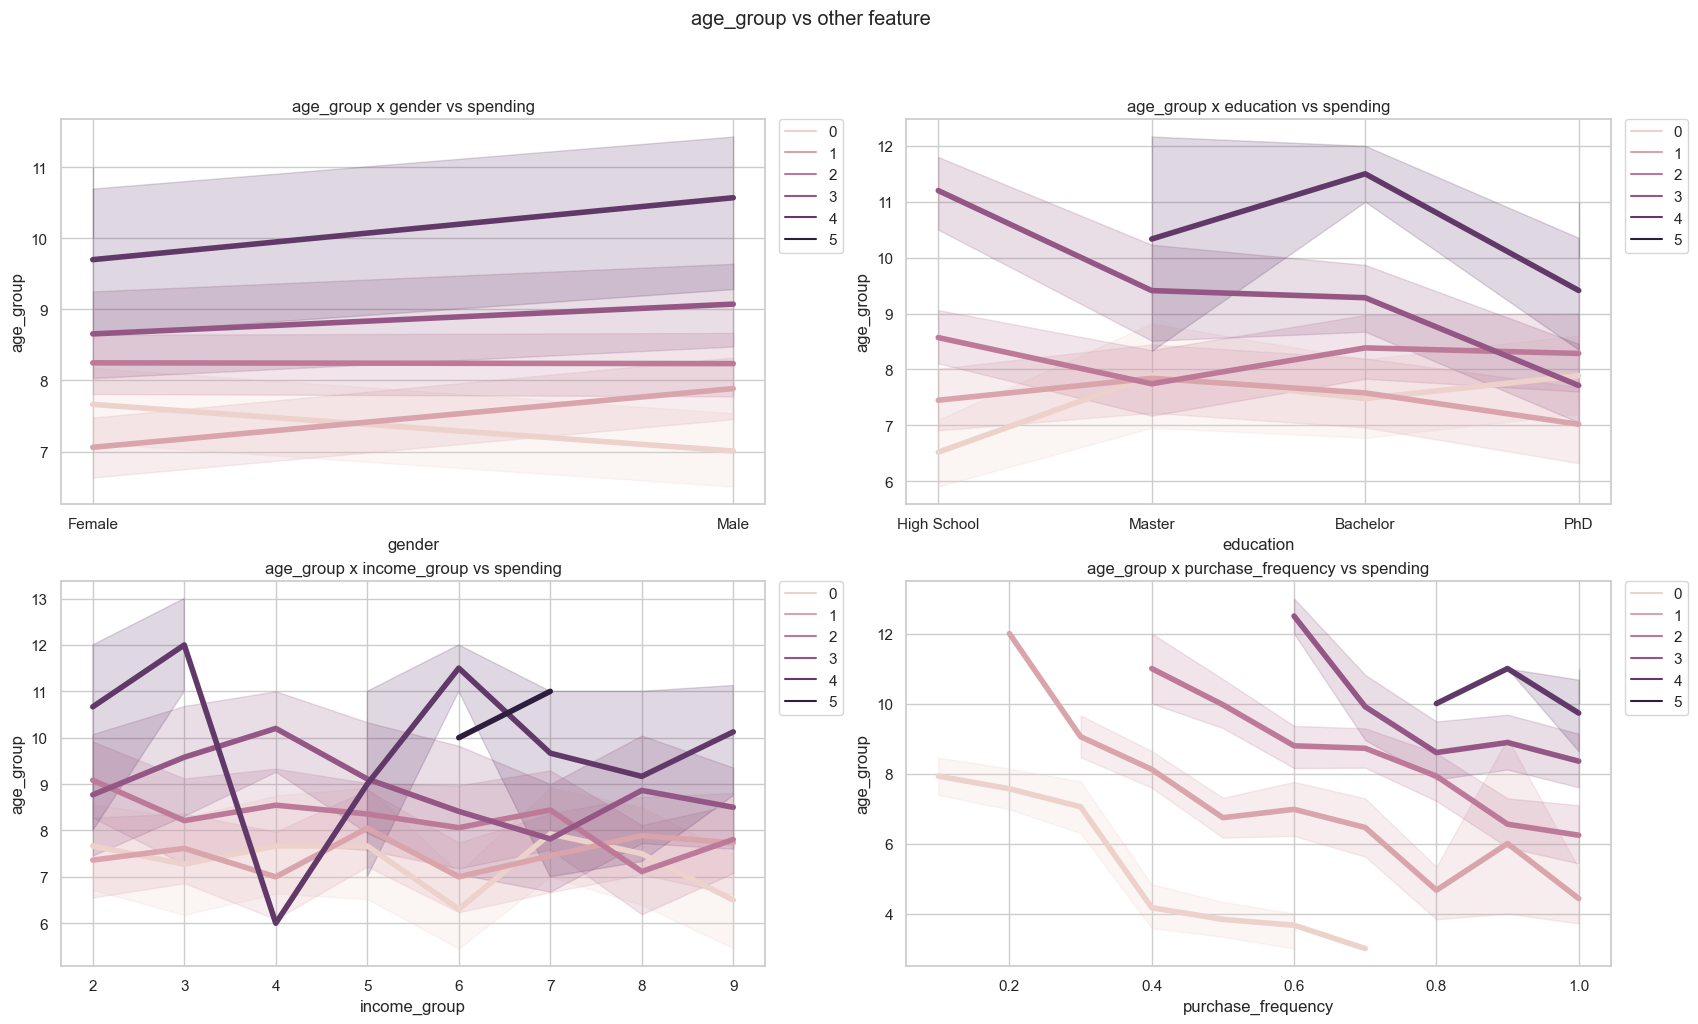

In [20]:
comp('age_group')

### Gender vs Other Features 

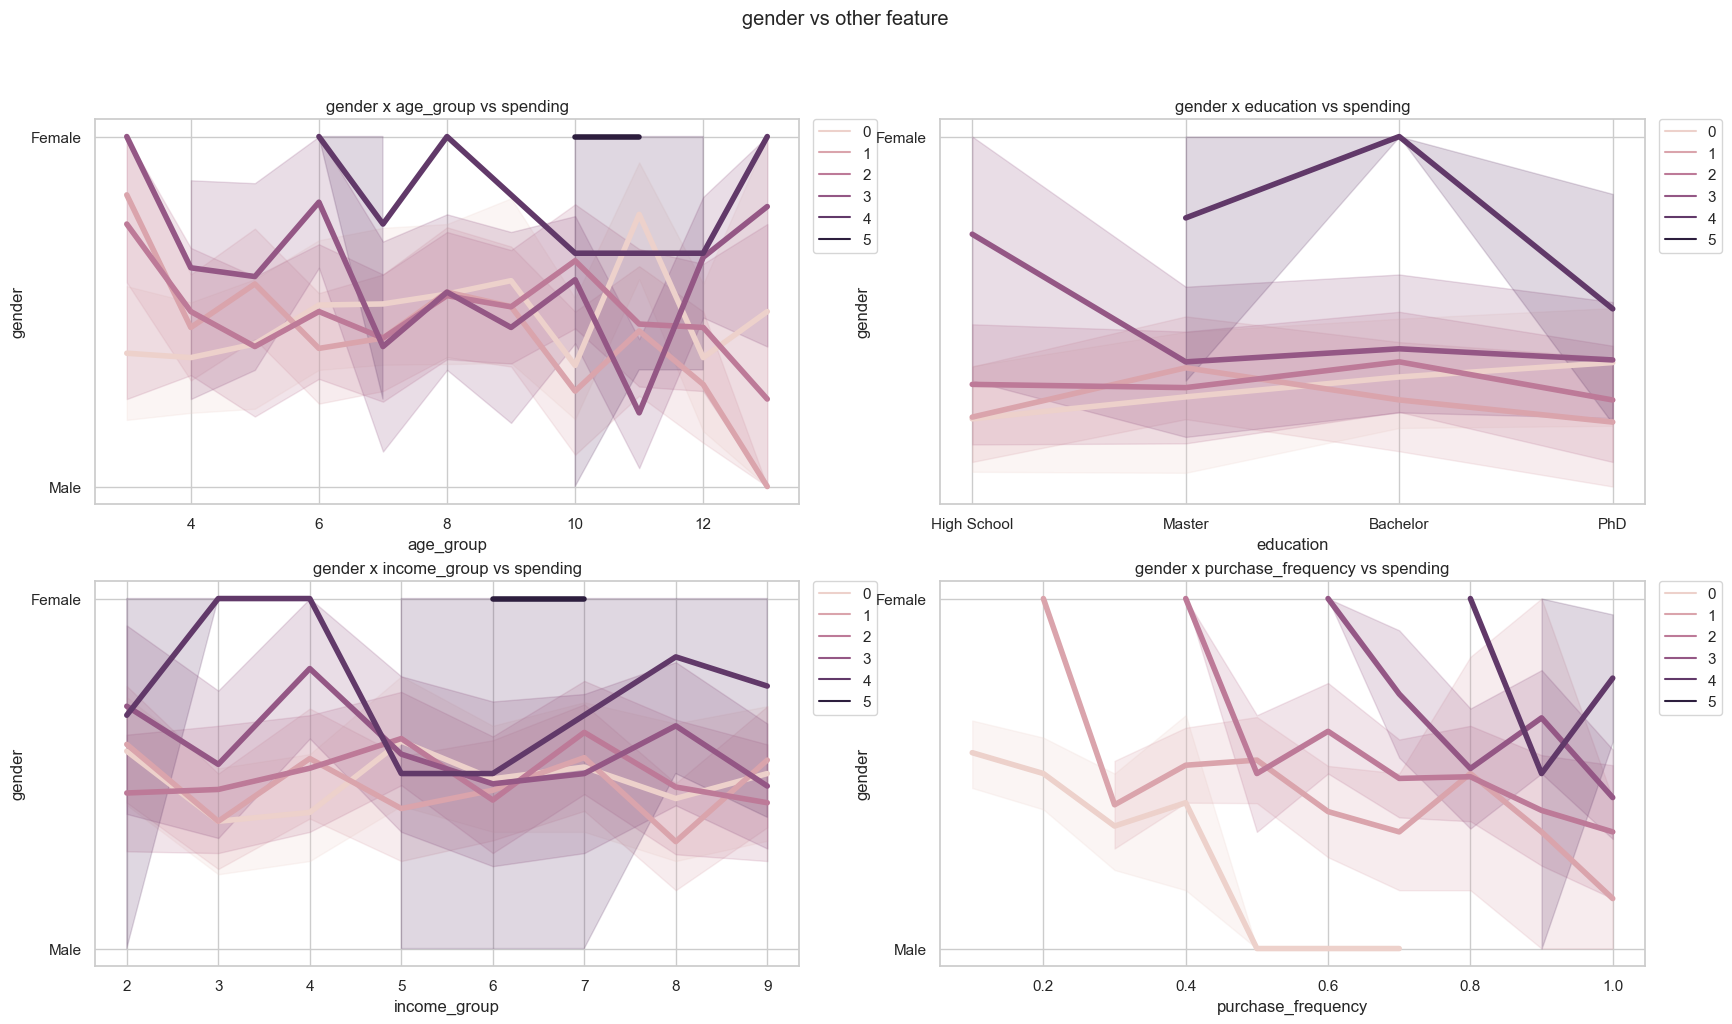

In [21]:
comp('gender')

### Education vs Other Features 

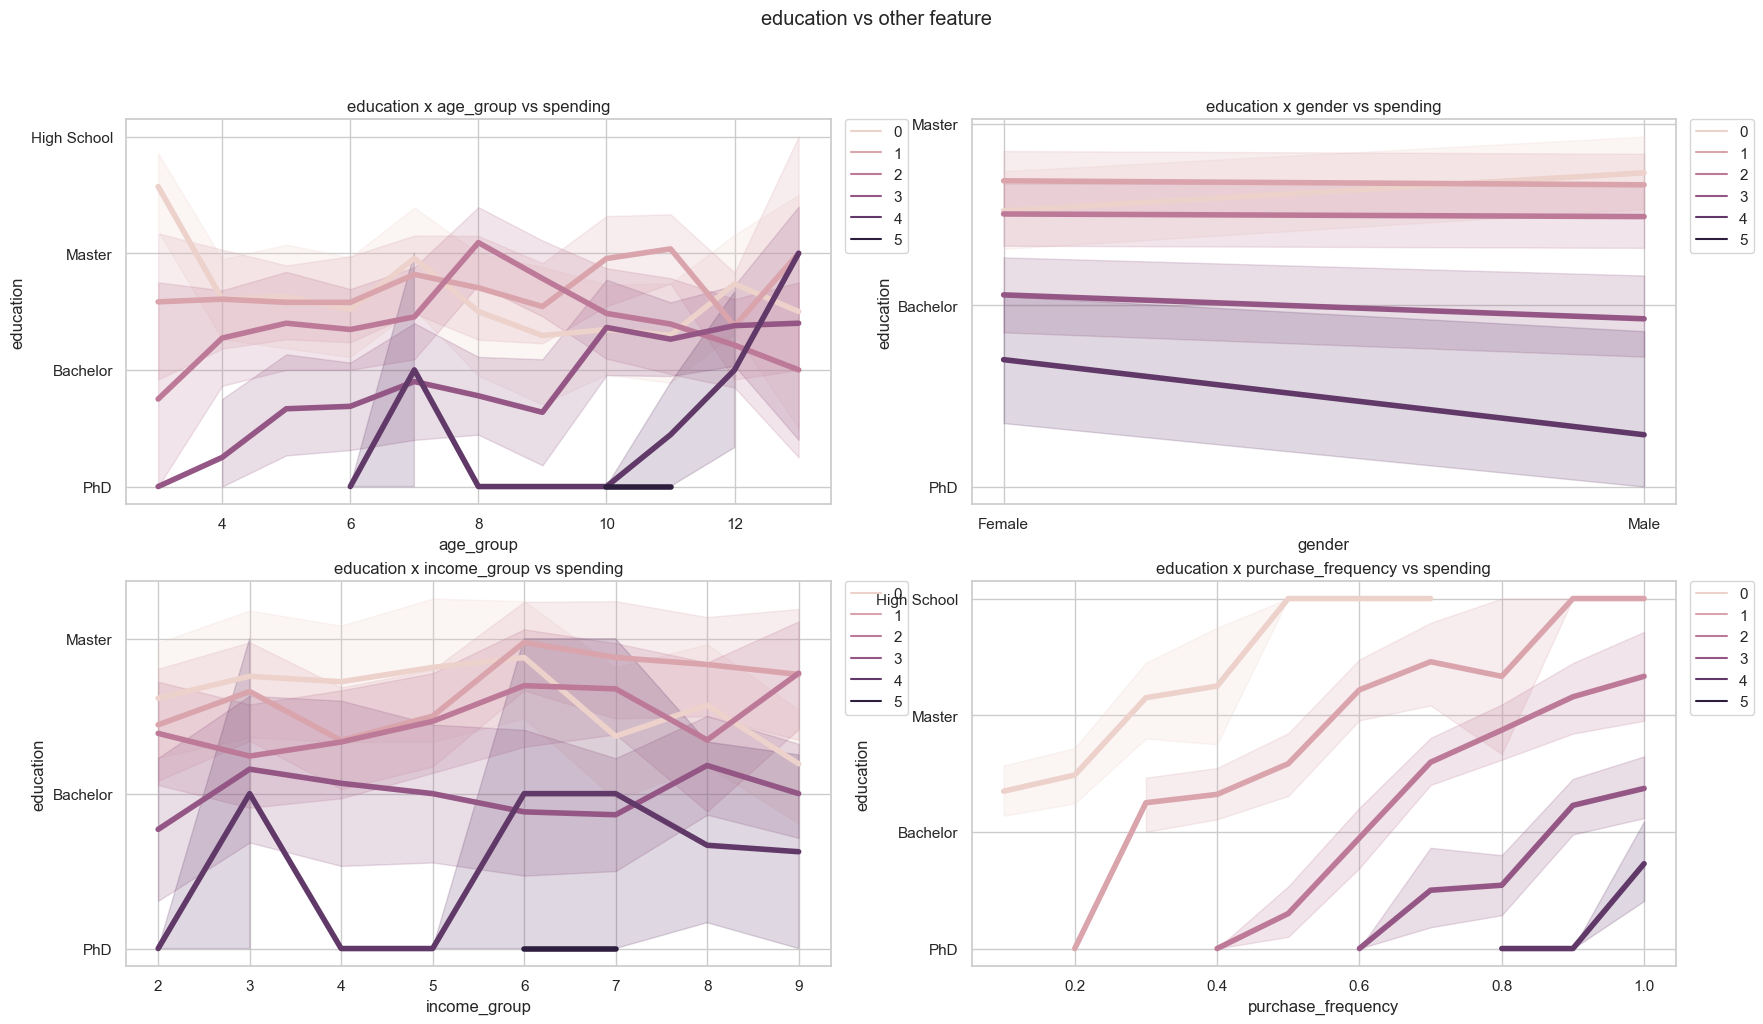

In [22]:
comp('education')

### Income vs Other Features 

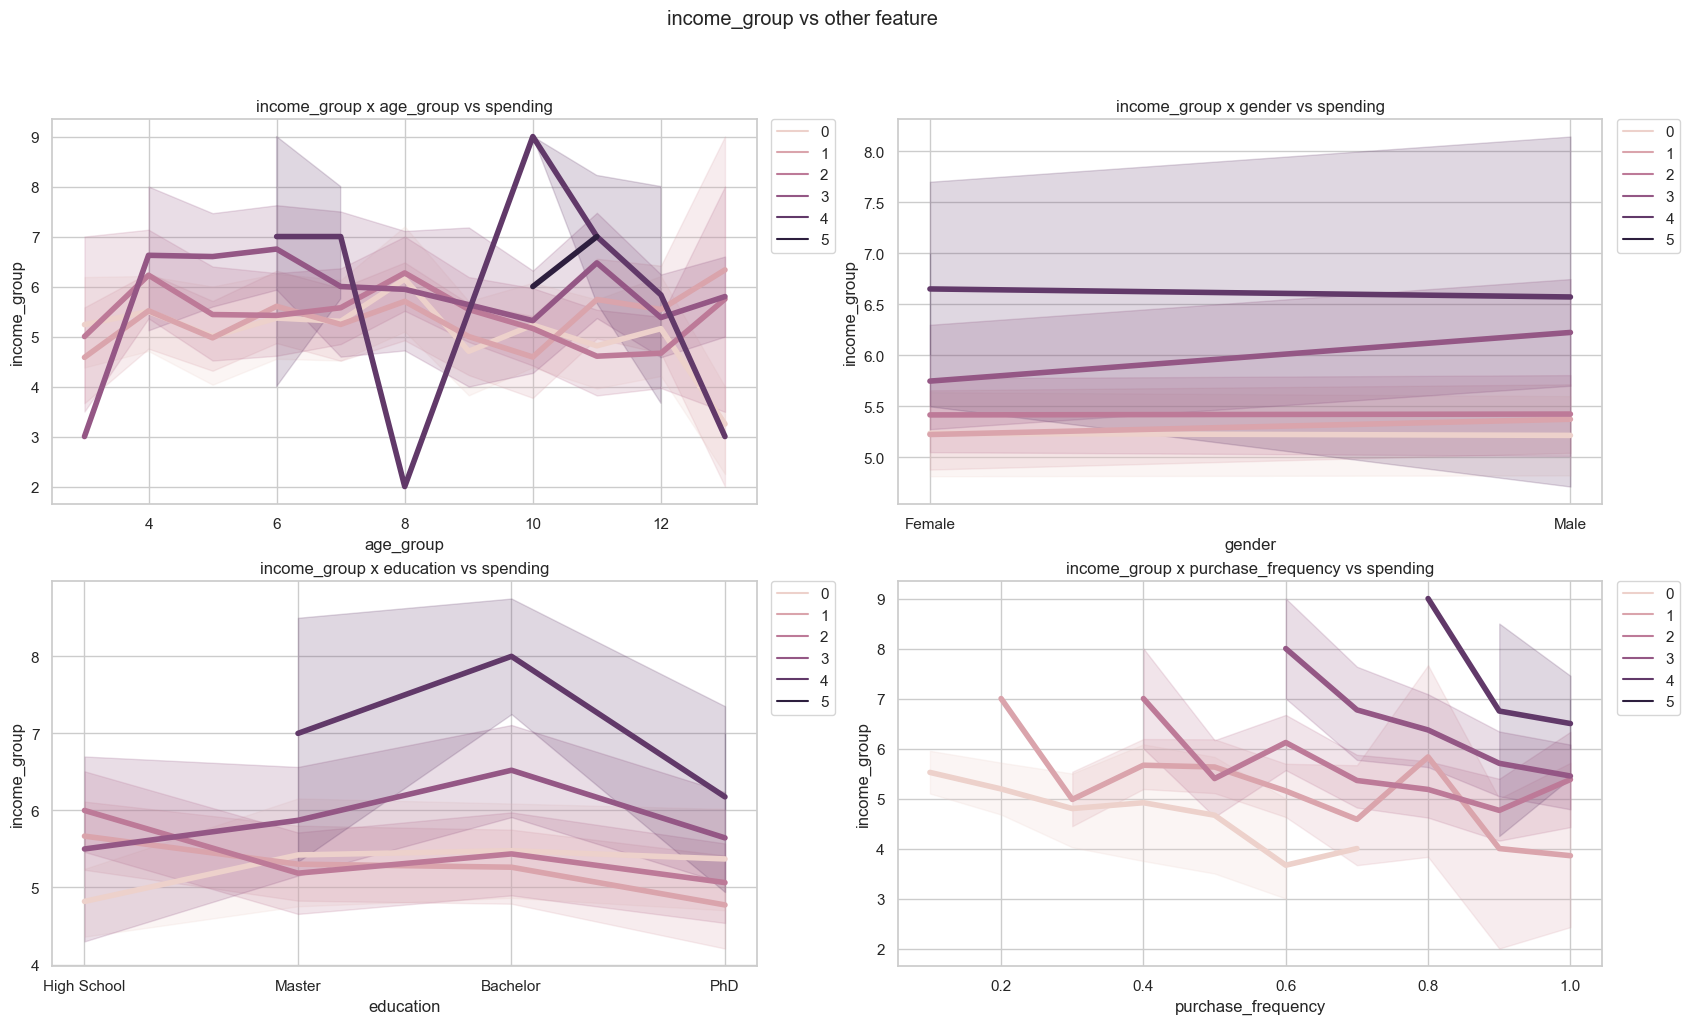

In [23]:
comp('income_group')

### Purchase Frequency vs Other Features 

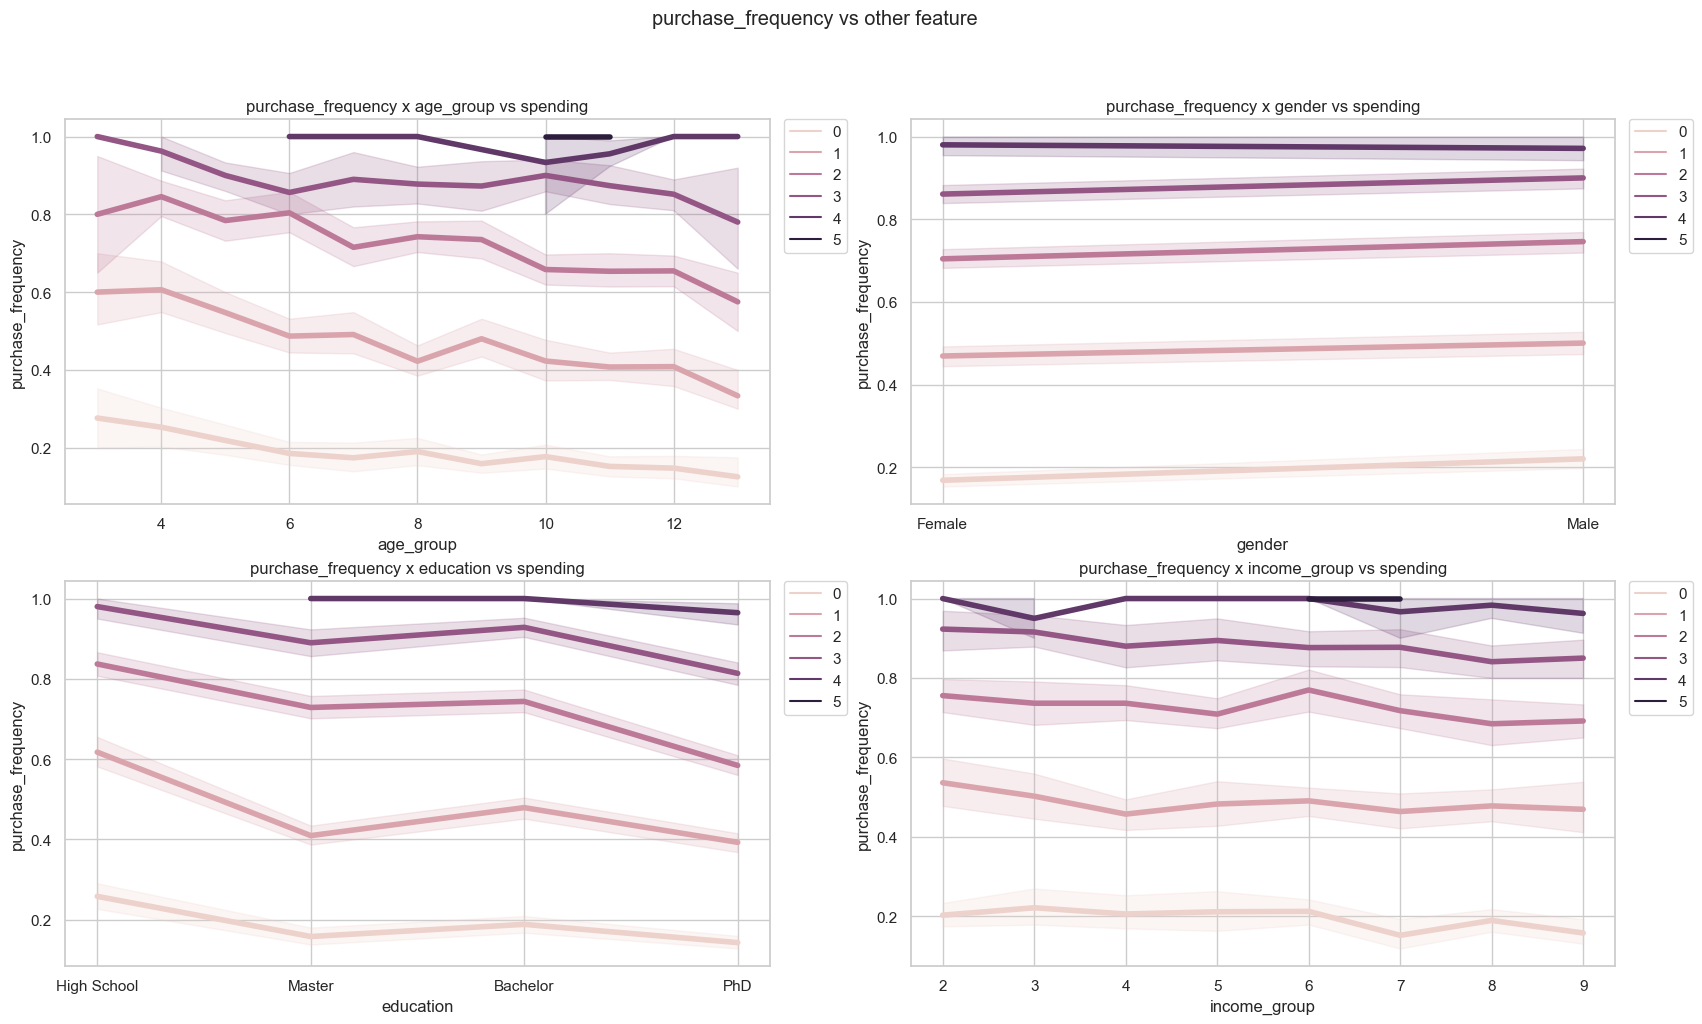

In [24]:
comp('purchase_frequency')

## Country 

### with Age 

In [25]:
CwA = df.groupby(['country', 'age_group'])['spending', 'spending_group'].mean().reset_index()
CwA.shape

(825, 4)

In [26]:
CwA = CwA.sort_values(by='spending_group', ascending=False).reset_index(drop=True).head(10)
CwA

,country,age_group,spending,spending_group
0,Martinique,10,25080.750,5.0
1,Spain,11,25546.500,5.0
2,Trinidad and Tobago,12,21767.550,4.0
3,Saint Lucia,11,24560.800,4.0
4,Lithuania,8,21274.850,4.0
5,Tanzania,12,21020.150,4.0
6,Turkey,10,21314.400,4.0
7,Palau,12,23342.300,4.0
8,Turks and Caicos Islands,11,21930.165,4.0
9,Saint Helena,11,24055.785,4.0


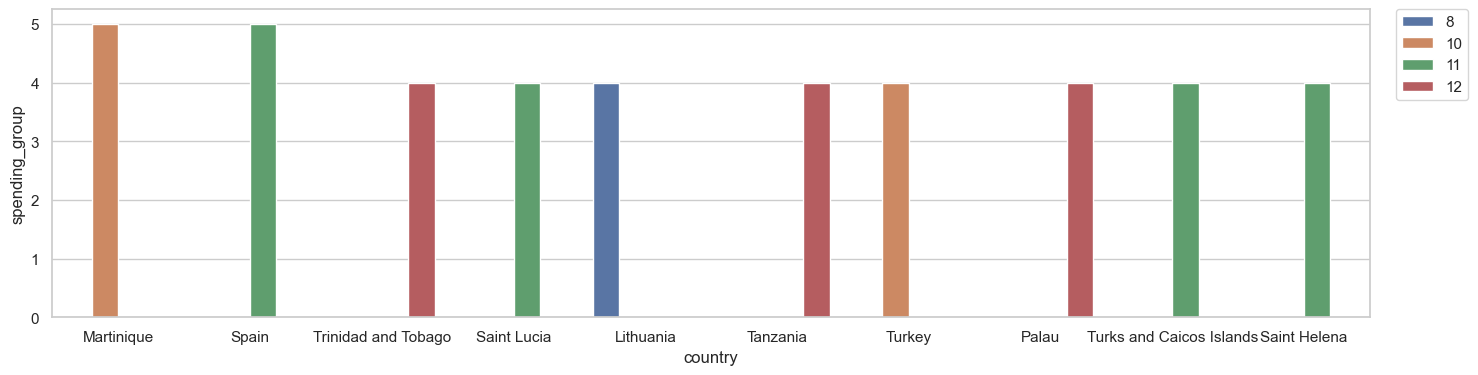

In [27]:
plt.figure(figsize=(17,4))
sns.barplot(data=CwA, x=CwA['country'], y=CwA['spending_group'], hue=CwA['age_group'])
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
plt.show()

### with Gender 

In [28]:
CwG = df.groupby(['country', 'gender'])['spending', 'spending_group'].mean().reset_index()
CwG.shape

(422, 4)

In [29]:
CwG = CwG.sort_values(by=['spending'], ascending=False).reset_index(drop=True).head(10)
CwG

,country,gender,spending,spending_group
0,Martinique,Female,25080.7500,5.000000
1,Saint Helena,Female,24055.7850,4.000000
2,Turks and Caicos Islands,Male,21930.1650,4.000000
3,Trinidad and Tobago,Male,21767.5500,4.000000
4,Switzerland,Female,19749.0500,3.333333
5,Hungary,Male,19438.7925,3.000000
6,Saint Lucia,Female,19405.7150,3.000000
7,Nepal,Male,19056.9500,3.000000
8,Mauritius,Male,18686.7500,3.000000
9,Falkland Islands (Malvinas),Male,18617.1200,3.000000


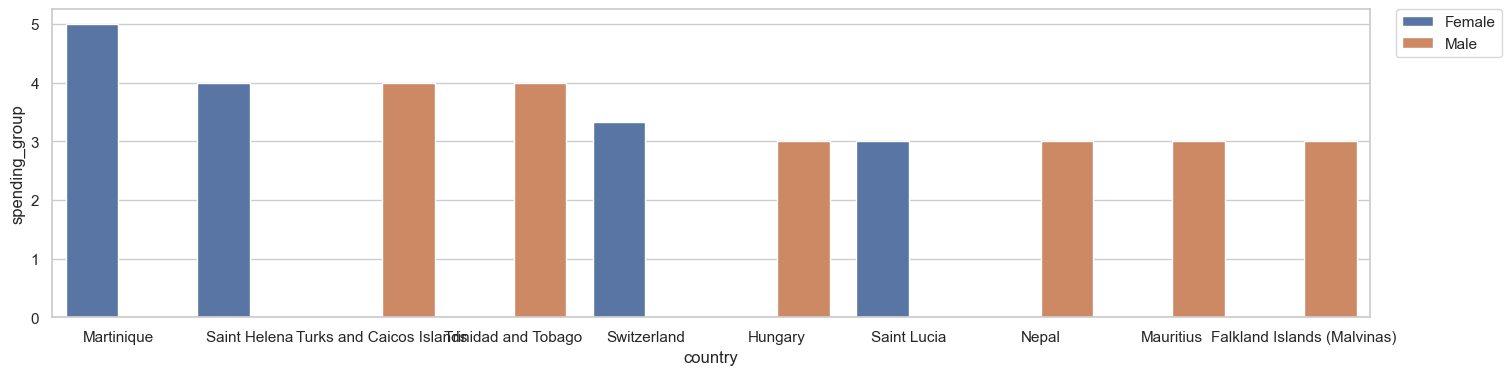

In [30]:
plt.figure(figsize=(17,4))
sns.barplot(data=CwG, x='country', y='spending_group', hue='gender', )
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
plt.show()

### with Education 

In [31]:
CwE = df.groupby(['country', 'education'])['spending', 'spending_group'].mean().reset_index()
CwE.shape

(625, 4)

In [32]:
CwE = CwE.sort_values(by=['spending'], ascending=False).reset_index(drop=True).head(10)
CwE

,country,education,spending,spending_group
0,Spain,PhD,25546.500,5.0
1,Martinique,PhD,25080.750,5.0
2,Switzerland,PhD,24506.850,4.0
3,Saint Helena,PhD,24055.785,4.0
4,Uganda,PhD,23902.900,4.0
5,Cape Verde,PhD,22235.500,4.0
6,Trinidad and Tobago,Master,21767.550,4.0
7,Turkey,PhD,21314.400,4.0
8,Lithuania,PhD,21274.850,4.0
9,Greece,Bachelor,21233.800,4.0


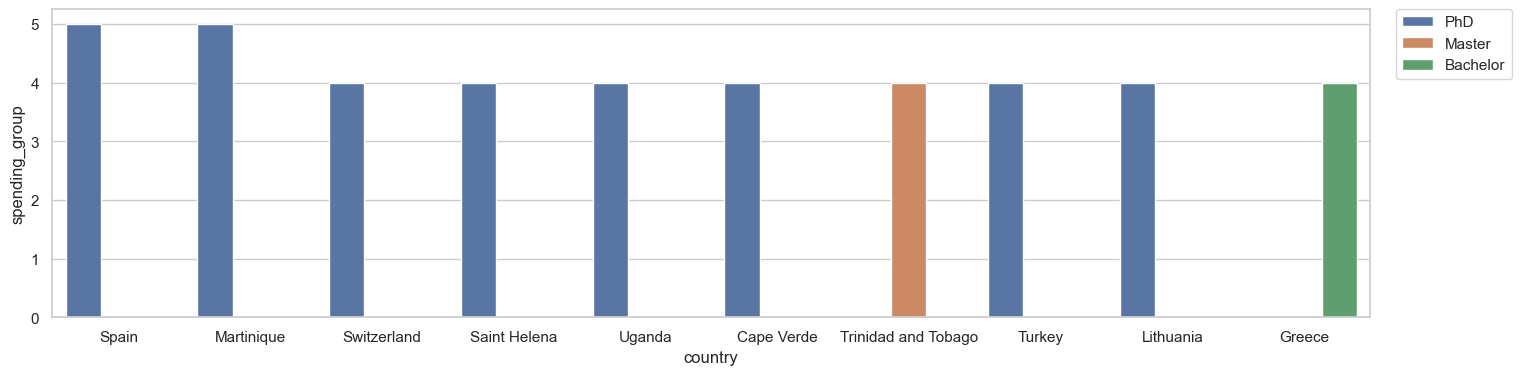

In [33]:
plt.figure(figsize=(17,4))
sns.barplot(data=CwE, x='country', y='spending_group', hue='education')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
plt.show()

### with Income 

In [34]:
df['income'].quantile([.33,.67])

0.33    45244.00
0.67    71880.35
Name: income, dtype: float64

In [35]:
df.loc[(df['income']<=45244), 'income_cat'] = 'Low'
df.loc[(df['income']>45244) & (df['income']<=71880), 'income_cat'] = 'Mid'
df.loc[(df['income']>71880), 'income_cat'] = 'High'

In [36]:
CwI = df.groupby(['country', 'income_cat'])['spending', 'spending_group'].mean().reset_index()
CwI.shape

(536, 4)

In [37]:
CwI = CwI.sort_values(by=['spending_group'], ascending=False).reset_index(drop=True).head(10)
CwI

,country,income_cat,spending,spending_group
0,Uganda,Mid,23066.0000,4.0
1,Italy,High,21511.0800,4.0
2,Saint Helena,High,24055.7850,4.0
3,Martinique,Mid,20884.2075,4.0
4,Saint Lucia,Mid,24560.8000,4.0
5,Turks and Caicos Islands,High,21930.1650,4.0
6,Tanzania,Low,21020.1500,4.0
7,Vietnam,High,21258.0500,4.0
8,Turkey,High,21314.4000,4.0
9,Lithuania,Low,21274.8500,4.0


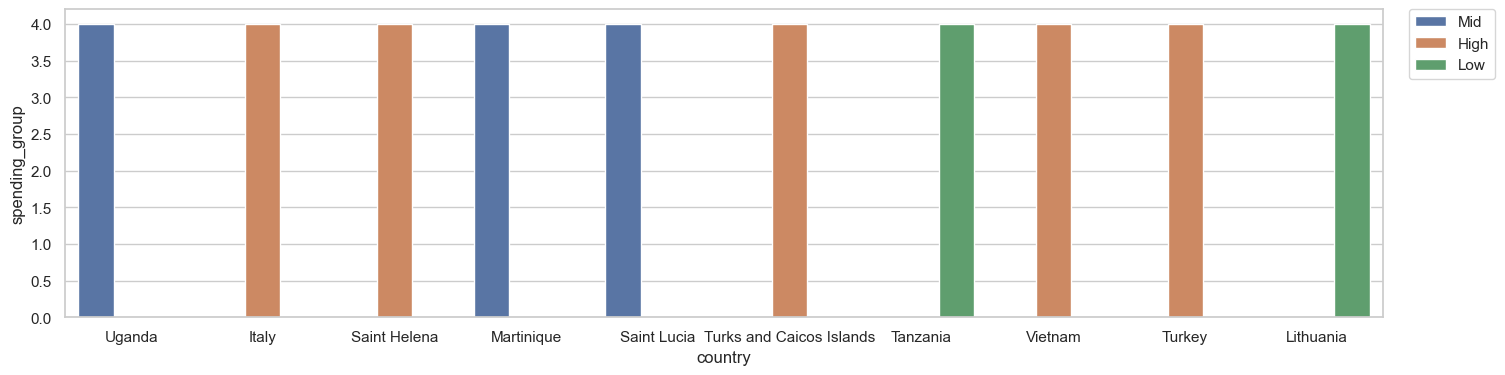

In [38]:
plt.figure(figsize=(17,4))
sns.barplot(data=CwI, x='country', y='spending_group', hue='income_cat')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
plt.show()

### with Purchase Frequency 

In [39]:
CwP = df.groupby(['country', 'purchase_frequency'])['spending', 'spending_group'].mean().reset_index()
CwP.shape

(807, 4)

In [40]:
CwP = CwP.sort_values(by=['spending'], ascending=False).reset_index(drop=True).head(10)
CwP

,country,purchase_frequency,spending,spending_group
0,Spain,1.0,25546.500,5.0
1,Martinique,1.0,25080.750,5.0
2,Saint Lucia,1.0,24560.800,4.0
3,Mozambique,1.0,24153.900,4.0
4,Saint Helena,0.9,24055.785,4.0
5,Uganda,1.0,23902.900,4.0
6,Cook Islands,1.0,23868.400,4.0
7,Palau,1.0,23342.300,4.0
8,Zambia,1.0,22656.200,4.0
9,Cape Verde,1.0,22235.500,4.0


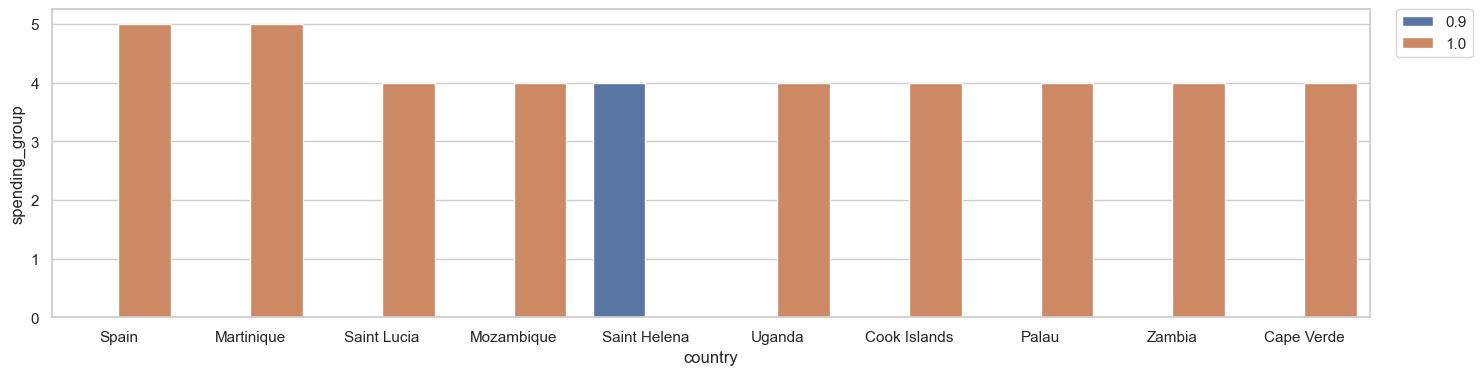

In [41]:
plt.figure(figsize=(17,4))
sns.barplot(data=CwP, x='country', y='spending_group', hue='purchase_frequency')
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)
plt.show()

# Feature Engineering

## Encoding 

In [42]:
from sklearn.preprocessing import LabelEncoder

for col in df_ori.columns:
    if df_ori[col].dtype == 'object':
        df_ori[col] = LabelEncoder().fit_transform(df_ori[col])

## Scaling 

In [43]:
from sklearn.preprocessing import MinMaxScaler

df_ori['age'] = MinMaxScaler().fit_transform(df_ori[['age']])
df_ori['income'] = MinMaxScaler().fit_transform(df_ori[['income']])

df_ori['spending'] = df_ori['spending'].round(0)
print(df_ori['spending'].dtype)
df_ori['spending'] = df_ori['spending'].astype(int)
print(df_ori['spending'].dtype)

float64
int32


## Correlation 

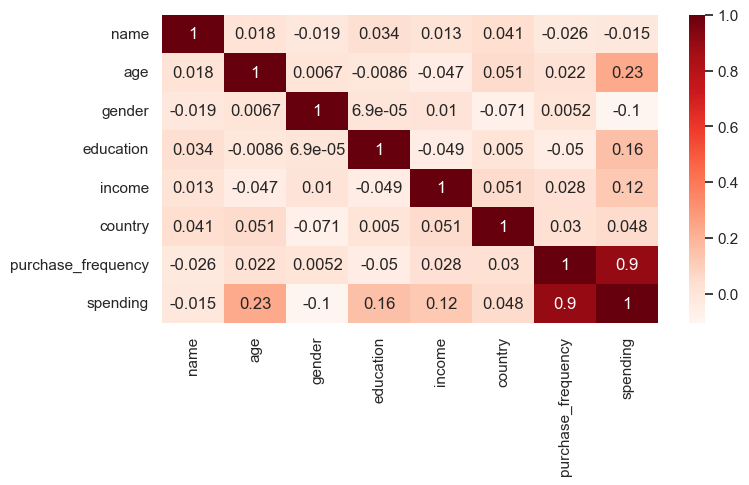

In [44]:
plt.figure(figsize=(8,4))
sns.heatmap(df_ori.corr(), annot=True, cmap='Reds')

plt.show()

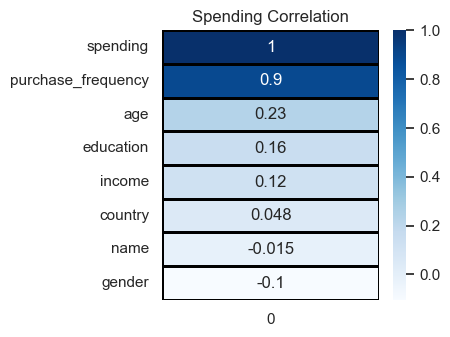

In [45]:
plt.subplots(figsize=(3.5,3.5))
sns.heatmap(df_ori.corrwith(df_ori['spending']).sort_values(ascending=False).to_frame(), annot=True, cmap='Blues', \
            linewidths=1, linecolor='black')
plt.title('Spending Correlation')
plt.show()

In [46]:
final = df_ori.copy()

In [47]:
final.shape

(1000, 8)

In [48]:
final = final.drop(columns=['name', 'country'])
final.shape

(1000, 6)

# Model

In [49]:
%%capture
!pip install pycaret

In [50]:
from pycaret.regression import *
s = setup(data=final, target='spending', session_id=123, fold=3, normalize=True, remove_outliers=True)

,Description,Value
0,Session id,123
1,Target,spending
2,Target type,Regression
3,Original data shape,"(1000, 6)"
4,Transformed data shape,"(965, 6)"
5,Transformed train set shape,"(665, 6)"
6,Transformed test set shape,"(300, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [51]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,361.6851,266115.1139,515.3987,0.9910,0.1098,0.0522,0.3533
lightgbm,Light Gradient Boosting Machine,359.3734,324072.1058,566.9240,0.9893,0.0797,0.0471,2.6333
et,Extra Trees Regressor,555.8245,704754.1962,836.5086,0.9763,0.0903,0.0656,0.5600
rf,Random Forest Regressor,652.9533,875699.9321,934.1635,0.9707,0.1057,0.0798,0.6333
ada,AdaBoost Regressor,1105.3822,2077334.2918,1437.9371,0.9310,0.2471,0.1989,0.3567
dt,Decision Tree Regressor,1035.0285,2354099.5898,1520.3826,0.9204,0.1554,0.1165,0.1467
ridge,Ridge Regression,1297.3216,2752739.3588,1659.0423,0.9078,0.3875,0.2323,0.2367
lar,Least Angle Regression,1296.6989,2752051.1568,1658.8377,0.9078,0.3821,0.2328,0.2267
br,Bayesian Ridge,1297.0039,2752383.2899,1658.9365,0.9078,0.3840,0.2326,0.3833
lasso,Lasso Regression,1296.6252,2752193.9280,1658.8797,0.9078,0.3825,0.2327,3.5133


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [52]:
tuned_model = tune_model(best, n_iter=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,284.7027,145763.6647,381.7901,0.9947,0.1585,0.0555
1,295.9550,142469.9973,377.4520,0.9958,0.1771,0.0640
2,255.4475,106874.2256,326.9162,0.9963,0.0821,0.0467
Mean,278.7017,131702.6292,362.0528,0.9956,0.1393,0.0554
Std,17.0728,17607.7498,24.9083,0.0007,0.0411,0.0070


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 100 candidates, totalling 300 fits


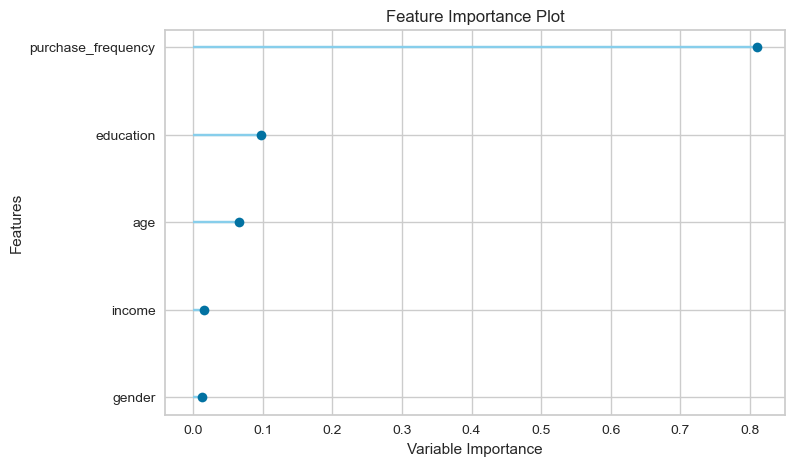

In [53]:
plot_model(tuned_model, plot = 'feature')